In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [15]:
airbnb = pd.read_csv('Albany AirBnB.csv')

In [16]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,248,2024-02-27,1.94,1,233,50,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.646150,-73.759660,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1091422934956081673,2 bed with parking off Madison,232967878,Diana,NaN,TENTH WARD,42.659882,-73.784858,Entire home/apt,105.0,2,0,NaN,NaN,22,87,0,NaN
400,1091500387329731524,Triplex oasis w:parking near MVP,232967878,Diana,NaN,SECOND WARD,42.643241,-73.758052,Entire home/apt,83.0,2,0,NaN,NaN,22,79,0,NaN
401,1097995825442731795,New Center square studio,232967878,Diana,NaN,SIXTH WARD,42.652689,-73.765674,Entire home/apt,93.0,2,0,NaN,NaN,22,75,0,NaN
402,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,NaN,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.0,3,0,NaN,NaN,9,155,0,NaN


In [4]:
airbnb['latitude'],airbnb['longitude']

(0      42.667190
 1      42.657890
 2      42.652220
 3      42.646150
 4      42.652220
          ...    
 399    42.659882
 400    42.643241
 401    42.652689
 402    42.670080
 403    42.669431
 Name: latitude, Length: 404, dtype: float64,
 0     -73.815800
 1     -73.753700
 2     -73.767240
 3     -73.759660
 4     -73.767240
          ...    
 399   -73.784858
 400   -73.758052
 401   -73.765674
 402   -73.806911
 403   -73.798820
 Name: longitude, Length: 404, dtype: float64)

In [5]:
airbnb_subset = airbnb.dropna(subset=['latitude', 'longitude'])


airbnb_map = folium.Map(location=[42.659882, -73.784858], zoom_start=15)

heat_data = [[row['latitude'], row['longitude']] for index, row in airbnb_subset.iterrows()]


airbnb_map.add_child(HeatMap(heat_data,
                              min_opacity=0.5,  # Minimum opacity of heatmap
                              radius=15,        # Radius of each point in pixels
                              blur=20           # Amount of blur
                              ))

airbnb_map

In [6]:
airbnb_map.save('AlbanyListingsHeatmap.html')

In [7]:
prices_map = folium.Map(location=[42.6526, -73.7562], zoom_start=12)

for index, row in airbnb.iterrows():
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=None,  # No icon
        popup=f"Price: ${row['price']}",
        tooltip=f"Price: ${row['price']}"  
    ).add_to(prices_map)


prices_map

In [8]:
prices_map.save('AlbanyPricesHeatmap.html')

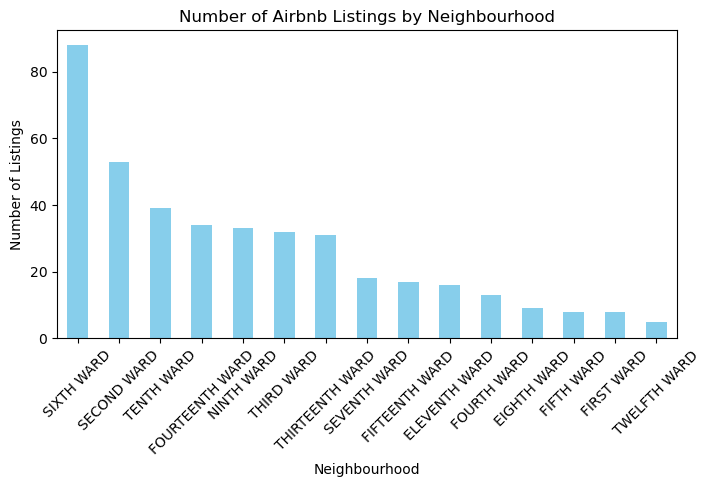

In [9]:
neighbourhood_counts = airbnb['neighbourhood'].value_counts()
neighbourhood_counts
# Plot the results
plt.figure(figsize=(8, 4))
neighbourhood_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Airbnb Listings by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

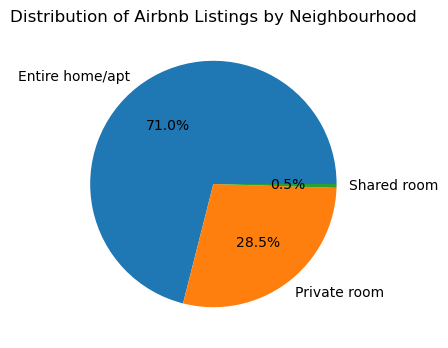

In [10]:
accommodation_counts = airbnb['room_type'].value_counts()

plt.figure(figsize=(8, 4))
accommodation_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Airbnb Listings by Neighbourhood')
plt.ylabel('')  # Remove the y-label
plt.show()

In [11]:
accommodation_counts = airbnb['room_type'].value_counts()
accommodation_counts 

room_type
Entire home/apt    287
Private room       115
Shared room          2
Name: count, dtype: int64

In [12]:
neighbourhood_prices = airbnb.groupby('neighbourhood')['price'].mean().sort_values()
neighbourhood_prices

neighbourhood
FOURTEENTH WARD     79.741935
ELEVENTH WARD       82.437500
THIRD WARD          96.750000
FIFTH WARD          97.000000
THIRTEENTH WARD    102.933333
SEVENTH WARD       103.187500
SIXTH WARD         107.229730
NINTH WARD         110.290323
SECOND WARD        115.571429
FOURTH WARD        118.583333
TENTH WARD         120.656250
TWELFTH WARD       133.600000
FIRST WARD         141.200000
EIGHTH WARD        197.500000
FIFTEENTH WARD     272.647059
Name: price, dtype: float64

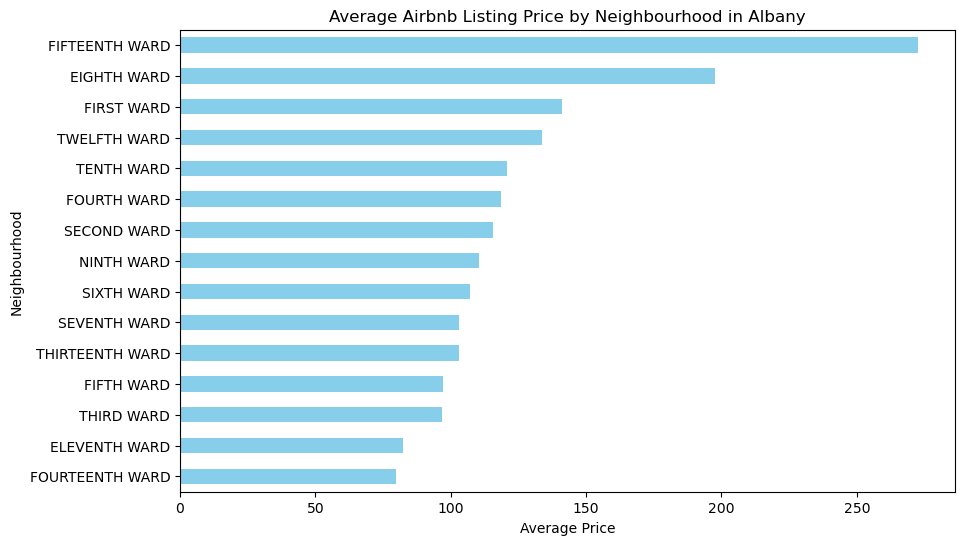

In [13]:
neighbourhood_prices = airbnb.groupby('neighbourhood')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
neighbourhood_prices.plot(kind='barh', color='skyblue')
plt.title('Average Airbnb Listing Price by Neighbourhood in Albany')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()